## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [2]:
df=pd.read_csv('Loan_StatusData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


In [3]:
df.shape

(500, 14)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [5]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income
count,500,491,497,488,500,473,500,500,500
unique,500,2,2,4,2,2,3,2,457
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y,$6000.0
freq,1,400,322,288,393,407,188,345,4


In [6]:
# Check duplicate Values
df.duplicated().sum()

0

# Handle Missing Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [8]:
a=df['Gender'].value_counts()
b=df['Married'].value_counts()
c=df['Dependents'].value_counts()
d=df['Self_Employed'].value_counts()
e=df['LoanAmount'].value_counts()
f=df['Loan_Amount_Term'].value_counts()
g=df['Credit_History'].value_counts()
df = df.fillna(
{
    'Gender':a.values[0],
    'Married':b.values[0],
    'Dependents':c.values[0],
    'Self_Employed':d.values[0],
    'LoanAmount':e.values[0],
    'Loan_Amount_Term':f.values[0],
    'Credit_History':g.values[0]
}
)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

# Check Data Types Of Each Columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             500 non-null    object 
 2   Married            500 non-null    object 
 3   Dependents         500 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      500 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         500 non-null    float64
 9   Loan_Amount_Term   500 non-null    float64
 10  Credit_History     500 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 54.8+ KB


## Clean The Data

In [11]:
df['Dependents']=df['Dependents'].str.replace('+','')
df['Total_Income']=df['Total_Income'].str.replace('$','')
df['Dependents']=df['Dependents'].astype(float)
df['Total_Income']=df['Total_Income'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             500 non-null    object 
 2   Married            500 non-null    object 
 3   Dependents         488 non-null    float64
 4   Education          500 non-null    object 
 5   Self_Employed      500 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         500 non-null    float64
 9   Loan_Amount_Term   500 non-null    float64
 10  Credit_History     500 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 54.8+ KB


In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,19.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,387.0,Urban,Y,7482.0
498,LP002600,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0


# Checking Outliers

In [14]:
q1,q3=np.percentile(df['LoanAmount'],[25,75])
q1,q3

(97.0, 160.0)

# Create Interquartile Range

In [15]:
iqr=q3-q1
iqr

63.0

# Lower And Upper Extreme

In [16]:
lx=q1-1.5*iqr
ux=q3+1.5*iqr
df=df.loc[df['LoanAmount']<ux]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,19.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,387.0,Urban,Y,7482.0
498,LP002600,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0


# Gender Count

In [17]:
df.loc[df['Gender']==400,'Gender']='Male'
gdf=df['Gender'].value_counts()
gdf=gdf.reset_index().rename(columns={'index':'Gender','Gender':'count'})
gdf

,Gender,count
0,Male,375
1,Female,87


# Married Count

In [18]:
df.loc[df['Married']==322,'Married']='Yes'
mdf=df['Married'].value_counts()
mdf=mdf.reset_index().rename(columns={'index':'Married','Married':'count'})
mdf

,Married,count
0,Yes,296
1,No,166


## Education Count

In [19]:
edf=df['Education'].value_counts()
edf=edf.reset_index().rename(columns={'index':'Education','Education':'count'})
edf

,Education,count
0,Graduate,356
1,Not Graduate,106


## Loan_Status Count

In [20]:
ldf=df['Loan_Status'].value_counts()
ldf=ldf.reset_index().rename(columns={'index':'Loan_Status','Loan_Status':'count'})
ldf

,Loan_Status,count
0,Y,324
1,N,138


## Self_Employed Count

In [21]:
df.loc[df['Self_Employed']==407,'Self_Employed']='No'
sdf=df['Self_Employed'].value_counts()
sdf=sdf.reset_index().rename(columns={'index':'Self_Employed','Self_Employed':'count'})
sdf

,Self_Employed,count
0,No,401
1,Yes,61


## Property_Area Count

In [22]:
pdf=df['Property_Area'].value_counts()
pdf=pdf.reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})
pdf

,Property_Area,count
0,Semiurban,174
1,Urban,159
2,Rural,129


# Create Total Income Range

In [23]:
x=df['Total_Income'].max()
def income_range(income):
    if(income<=5000):
        return '0-5000'
    elif(income<=10000):
        return '5000-10000'
    elif(income<=15000):
        return '10000-15000'
    elif(income<=20000):
        return '15000-20000'
    elif(income<=25000):
        return '20000-25000'
    elif(income<=30000):
        return '25000-30000'
    elif(income<=35000):
        return '30000-35000'
    elif(income<=40000):
        return '35000-40000'
    else:
        return '40000-above'
    
df['income_range']=df['Total_Income'].apply(income_range)

In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,income_range
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,19.0,360.0,1.0,Urban,Y,5849.0,5000-10000
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,5000-10000
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0-5000
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0-5000
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,5000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0,0-5000
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0,0-5000
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,387.0,Urban,Y,7482.0,5000-10000
498,LP002600,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0,0-5000


## Create ApplicantIncome Range

In [25]:
a=df['ApplicantIncome'].max()
x=list(range(0,int(a),7000))
def applicant_range(income):
    if(income<=7000):
        return '0-7000'
    elif(income<=14000):
        return '7000-14000'
    elif(income<=21000):
        return '14000-21000'
    elif(income<=28000):
        return '21000-28000'
    elif(income<=35000):
        return '28000-35000'
    else:
        return '35000-above'
    
df['applicant_income_range']=df['ApplicantIncome'].apply(applicant_range)

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,income_range,applicant_income_range
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,19.0,360.0,1.0,Urban,Y,5849.0,5000-10000,0-7000
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,5000-10000,0-7000
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0-5000,0-7000
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0-5000,0-7000
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,5000-10000,0-7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0,0-5000,0-7000
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0,0-5000,0-7000
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,387.0,Urban,Y,7482.0,5000-10000,0-7000
498,LP002600,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,2895.0,0-5000,0-7000


# Income Range Count

In [27]:
idf=df['income_range'].value_counts()
idf=idf.reset_index().rename(columns={'index':'income_range','income_range':'count'})
idf

,income_range,count
0,0-5000,223
1,5000-10000,197
2,10000-15000,30
3,15000-20000,7
4,20000-25000,3
5,40000-above,1
6,35000-40000,1


# Educationwise Loan Amount

In [28]:
tdf=df.groupby('Education').agg(
total_loan_amount=('LoanAmount','sum'))
tdf=tdf.reset_index().sort_values(by='total_loan_amount',ascending=False)
tdf

,Education,total_loan_amount
0,Graduate,44286.0
1,Not Graduate,11810.0


## Only Loan Amount Credit History

In [29]:
adf=df.loc[df['Credit_History']==1]
adf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,income_range,applicant_income_range
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,19.0,360.0,1.0,Urban,Y,5849.0,5000-10000,0-7000
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,5000-10000,0-7000
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0-5000,0-7000
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0-5000,0-7000
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,5000-10000,0-7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,LP002571,Male,No,0.0,Not Graduate,No,3691,0.0,110.0,360.0,1.0,Rural,Y,3691.0,0-5000,0-7000
493,LP002582,Female,No,0.0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban,Y,17263.0,15000-20000,14000-21000
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,4239.0,0-5000,0-7000
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,4300.0,0-5000,0-7000


## Data Visualization

## Gender Count-Visualize

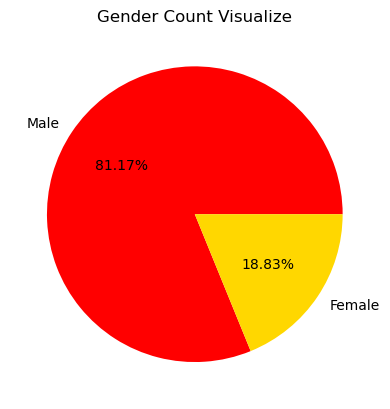

In [30]:
plt.pie(gdf['count'],labels=gdf['Gender'],autopct='%.2f%%',colors=['#FF0000','#FFD700'])
plt.title('Gender Count Visualize')
plt.show()

## Gender Loan Status-Visualize

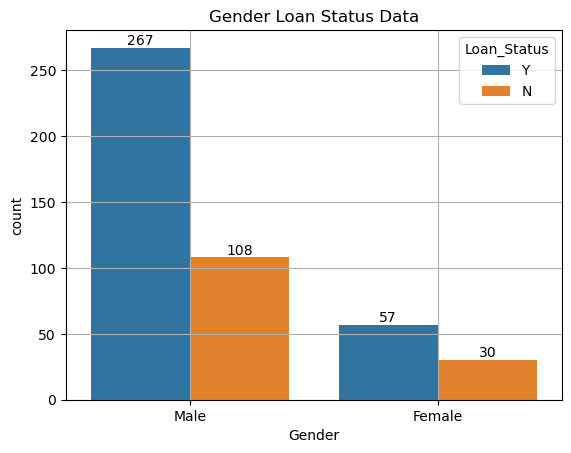

In [31]:
ax=sns.countplot(data=df,x='Gender',hue='Loan_Status')
for container in ax.containers:
    ax.bar_label(container)
plt.grid()
plt.title('Gender Loan Status Data')
plt.show()

# Gender Married Relation-Visualize

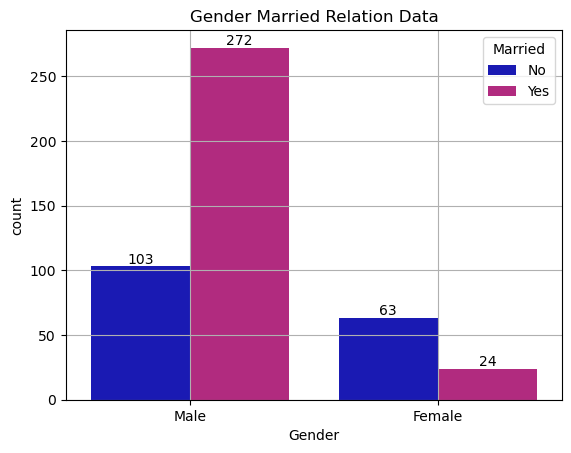

In [32]:
ax=sns.countplot(data=df,x='Gender',hue='Married',palette=['#0000CD','#C71585'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid()
plt.title('Gender Married Relation Data')
plt.show()

## Property_Area Loan_Status Relation-Visualize

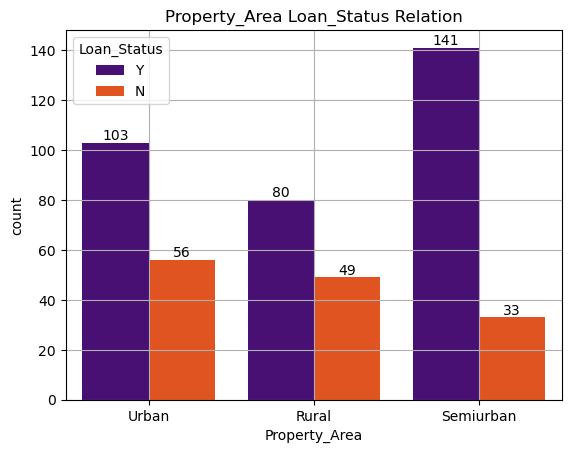

In [33]:
ax=sns.countplot(data=df,x='Property_Area',hue='Loan_Status',palette=['#4B0082','#FF4500','#00FF00'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid()
plt.title('Property_Area Loan_Status Relation')
plt.show()

## Gender With Only Loan Amount Credit History

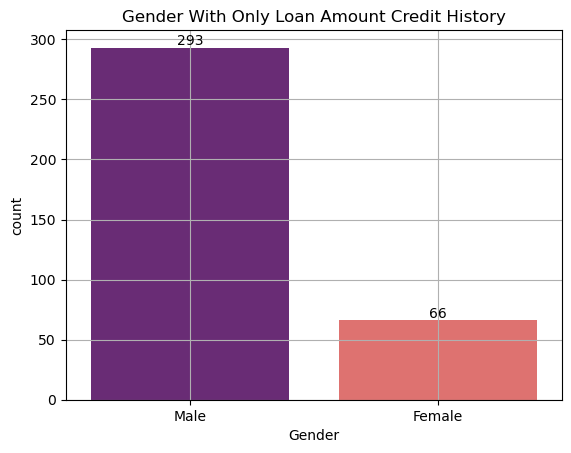

In [34]:
ax=sns.countplot(data=adf,x='Gender',order=adf['Gender'].value_counts().index,palette='magma')
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('Gender With Only Loan Amount Credit History')
plt.show()

## Income Range Count-Visualize

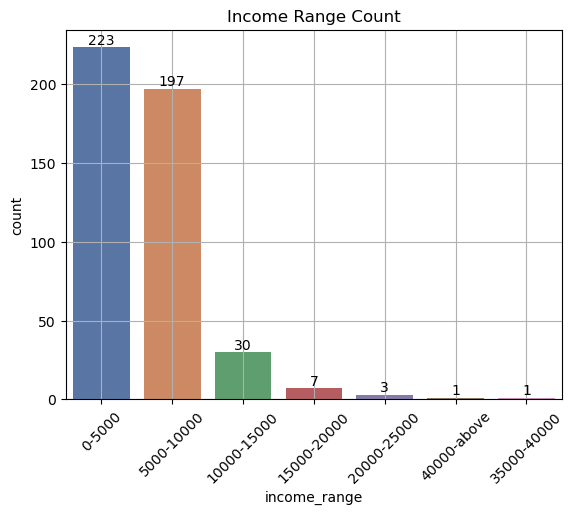

In [35]:
ax=sns.barplot(data=idf,x='income_range',y='count',palette='deep')
ax.bar_label(ax.containers[0])
plt.title('Income Range Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# LoanAmount Total_Income Relation

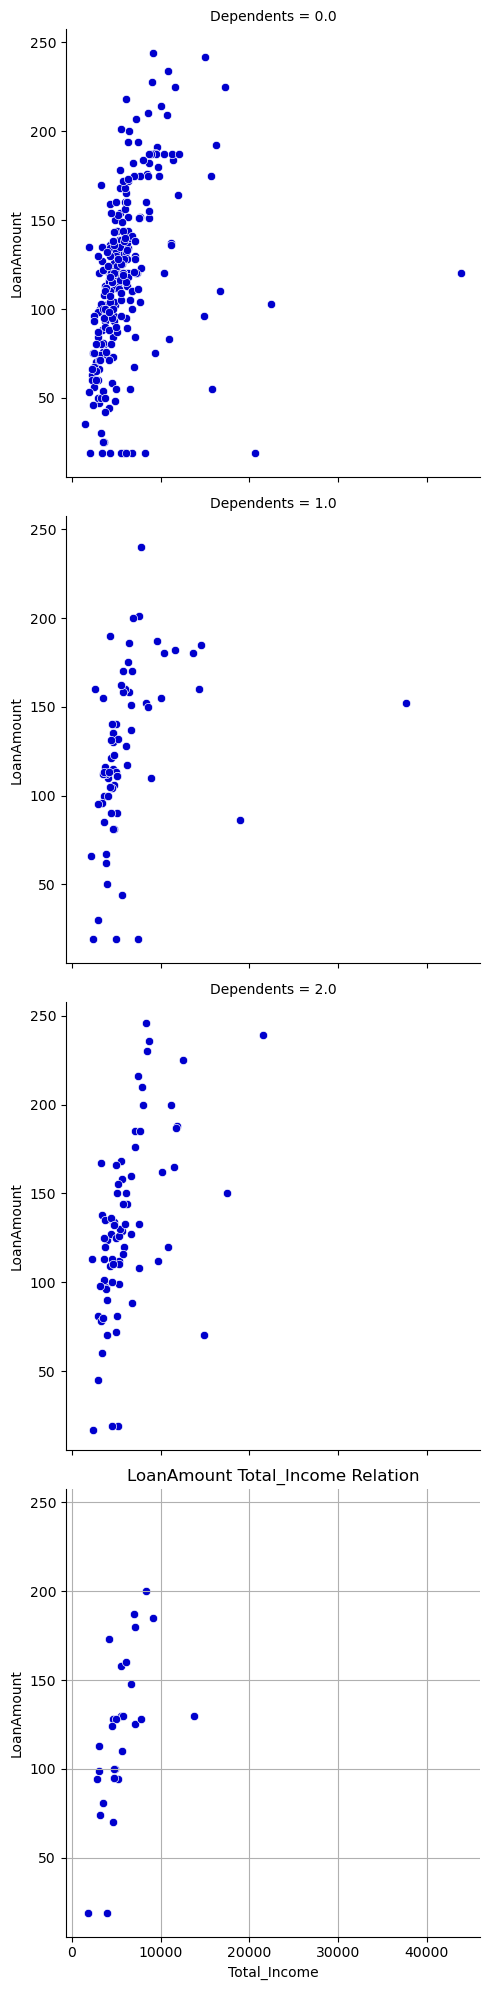

In [36]:
sns.relplot(data=df,x='Total_Income',y='LoanAmount',row='Dependents',color='#0000CD')
plt.title('LoanAmount Total_Income Relation')
plt.grid()
plt.show()

# Educationwise Loan Amount-Visualize

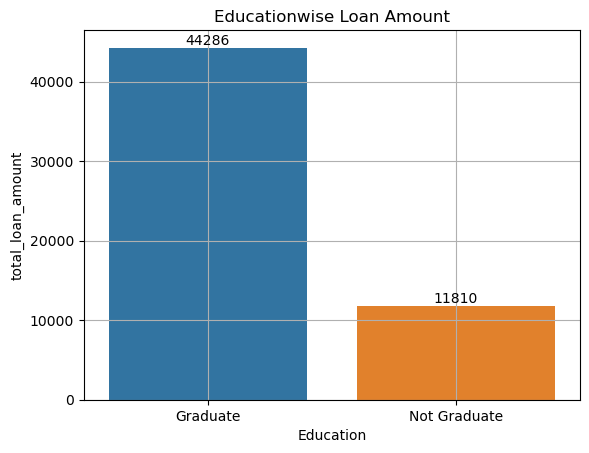

In [37]:
ax=sns.barplot(data=tdf,x='Education',y='total_loan_amount')
ax.bar_label(ax.containers[0])
plt.grid()
plt.title('Educationwise Loan Amount')
plt.show()

# Applicantincome Range-Count

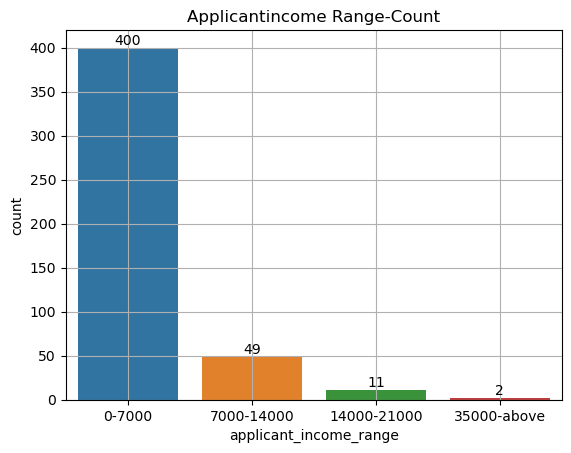

In [38]:
ax=sns.countplot(data=df,x='applicant_income_range',order=df['applicant_income_range'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Applicantincome Range-Count')
plt.grid()
plt.show()

## CoapplicantIncome and Loan_Amount_Term Relation

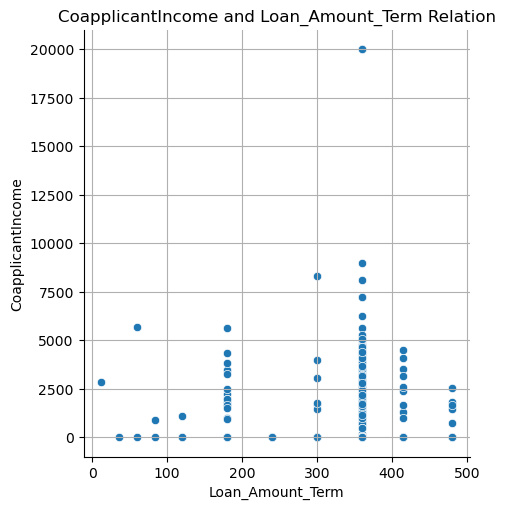

In [39]:
sns.relplot(data=df,y='CoapplicantIncome',x='Loan_Amount_Term')
plt.grid()
plt.title('CoapplicantIncome and Loan_Amount_Term Relation')
plt.show()

# Gender Self_Employed Relation-Visualize

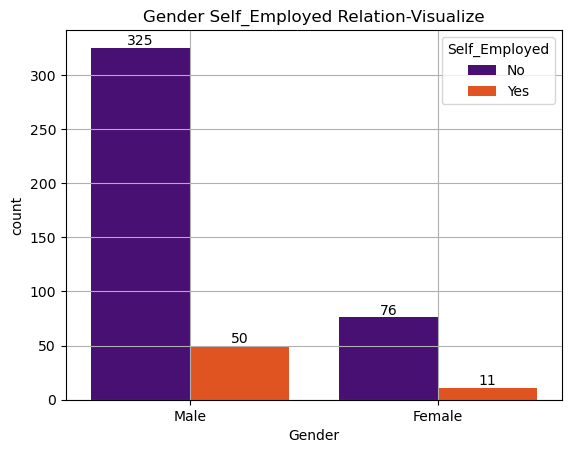

In [40]:
ax=sns.countplot(data=df,x='Gender',hue='Self_Employed',palette=['#4B0082','#FF4500'])
for container in ax.containers:
    ax.bar_label(container)
plt.grid()
plt.title('Gender Self_Employed Relation-Visualize')
plt.show()

## Heatmap Plot

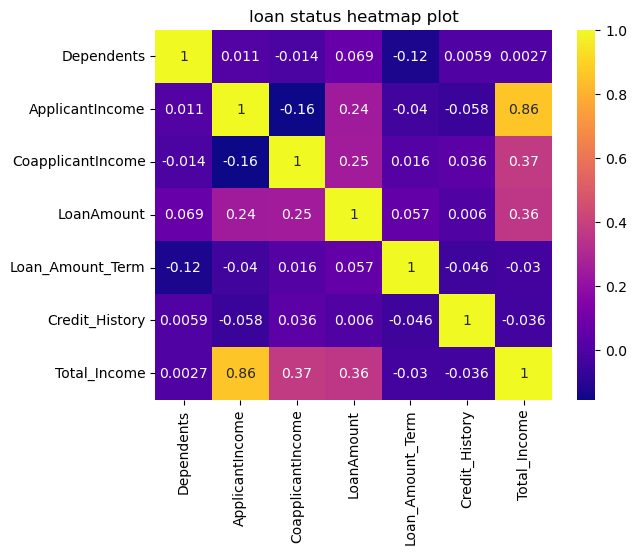

In [41]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.title('loan status heatmap plot')
plt.show()

# The End